# Bridges and Articulation Points

In [2]:
import graphviz as gv
import numpy as np
import pandas as pd

def adjmShow(M, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(M)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  for u in range(n):
    for v in range(0 if directed else u, n):
      if weighted:
        if not np.isnan(M[u, v]):
          g.edge(str(u), str(v), f"{M[u, v]:.0f}")
      else:
        if M[u, v] == 1:
          g.edge(str(u), str(v))
  return g
def adjlShow(L, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

In [3]:
%%file g.txt
1
0 2 5
1 3
2 4 5
3
1 3

Writing g.txt


In [4]:
%%file g2.txt
1 2
0 2
0 1 3 4
2
2 5 6
4 7
4 7
5 6

Writing g2.txt


[(4, 3), (1, 0)]


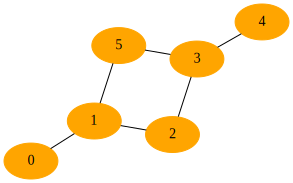

In [5]:
G, _ = readAdjl("g.txt")

def BridgesOnGraph(G, start):
    n = len(G)
    visited = [False]*n
    disc = [-1]*n
    low = [-1]*n
    parent = [None]*n
    bridges = []
    counter = [0]
    def dfs(current,prev):
        if visited[current]:
            if current != parent[prev]:
                if disc[current] < low[prev]:
                    low[prev] = disc[current]
            return
        visited[current] = True
        counter[0] += 1
        disc[current] = counter[0]
        low[current] = counter[0]
        parent[current] = prev
        for v in G[current]:
            dfs(v,current)
        if current != start:
            if low[current] < low[prev]:
                low[prev] = low[current]
            if low[current] > disc[prev]:
                bridges.append((current,prev))
    
    dfs(start,None)

    return bridges

print(BridgesOnGraph(G,0))

adjlShow(G)

[(3, 2), (4, 2)]


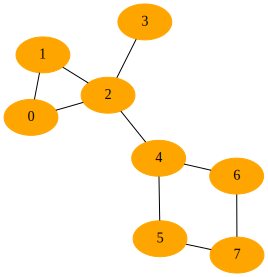

In [6]:
G2, _ = readAdjl("g2.txt")
print(BridgesOnGraph(G2,0))
adjlShow(G2)

# Articulation Points

In [7]:
%%file ap.txt
1 3
0 2
1 3 6
0 2 4 5
3 5
3 4
2

Writing ap.txt


[2, 3]
[3, 2]


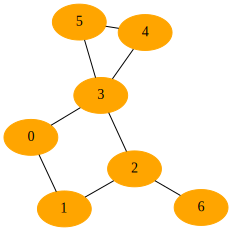

In [8]:
def ArticulationPointsInGraph(graph,start):
    n = len(graph)
    visited = [False]*n
    parent = [None]*n
    children = [0]*n
    disc = [-1]*n
    low = [-1]*n
    articulationPoints = [False]*n
    time = [0]
    def dfs(current,prev):
        if visited[current]:
            if current != parent[prev]:
                if disc[current] < low[prev]:
                    low[prev] = disc[current]
            return
        visited[current] = True
        parent[current] = prev
        if current != start:
            children[prev] += 1
        time[0] += 1
        disc[current] = time[0]
        low[current] = time[0]
        for v in graph[current]:
            dfs(v,current)
        if current != start:
            if prev != start:
                if low[current] < low[prev]:
                    low[prev] = low[current]
                if low[current] >= disc[prev]:
                    articulationPoints[prev] = True
        else:
            if children[current] > 1:
                articulationPoints[current] = True
    dfs(start,None)
    result = []
    for v in range(len(articulationPoints)):
        if articulationPoints[v]:
            result.append(v)
    return result

def ap2(graph,start):
    n = len(graph)
    visited = [False]*n
    parent = [None]*n
    children = [0]*n
    disc = [-1]*n
    low = [-1]*n
    articulationPoints = []
    time = [1]
    def dfs(v):
        visited[v] = True
        low[v] = disc[v] = time[0]
        time[0] += 1
        for u in graph[v]:
            if not visited[u]:
                parent[u] = v
                children[v] += 1
                dfs(u)
                low[v] = min(low[v],low[u])
                if parent[v] == None and children[v] > 1:
                    articulationPoints.append(v)
                if parent[v] != None and low[u] >= disc[v]:
                    articulationPoints.append(v)
            elif u != parent[v]:
                low[v] = min(low[v],disc[u])
    dfs(start)
    return articulationPoints

G3, _ = readAdjl("ap.txt")
print(ArticulationPointsInGraph(G3,0))
print(ap2(G3,0))
#adjlShow(G3,labels=('A','B','C','D','E','F','G'))
adjlShow(G3)


[1, 3]
[3, 1]


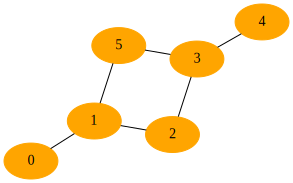

In [9]:
G4, _ = readAdjl("g.txt")
print(ArticulationPointsInGraph(G4,0))
print(ap2(G4,0))
adjlShow(G4)

[2, 4]
[2, 4, 2]


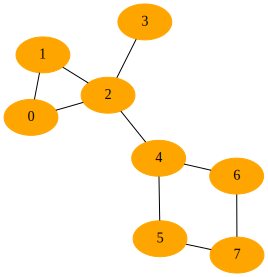

In [10]:
G5, _ = readAdjl("g2.txt")
print(ArticulationPointsInGraph(G5,0))
print(ap2(G5,0))
adjlShow(G5)